In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Crime_Prediction_in_Chicago_Dataset.csv')

In [3]:
dataset.shape
dataset.columns
dataset.dtypes
dataset.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12592454,JF113025,1/14/2022 15:55,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,16.0,68,26,1170805.0,1860170.0,2022,9/14/2023 15:41,41.771782,-87.649437,"(41.771782439, -87.649436929)"
1,12785595,JF346553,8/5/2022 21:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,...,5.0,69,17,1185135.0,1857211.0,2022,9/14/2023 15:41,41.763338,-87.597001,"(41.763337967, -87.597001131)"
2,12808281,JF373517,8/14/2022 14:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,39.0,11,17,1138383.0,1937953.0,2022,9/14/2023 15:41,41.985875,-87.766404,"(41.985875279, -87.766403857)"
3,12888104,JF469015,11/10/2022 3:47,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,...,17.0,68,15,1169903.0,1856822.0,2022,9/14/2023 15:41,41.762615,-87.652840,"(41.76261474, -87.652840463)"
4,13209277,JG422539,8/15/2022 9:00,0000X W JACKSON BLVD,810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,...,4.0,32,6,NaN,NaN,2022,9/14/2023 15:43,NaN,NaN,NaN


In [4]:
dataset.isnull().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     965
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      10
Community Area             0
FBI Code                   0
X Coordinate            4667
Y Coordinate            4667
Year                       0
Updated On                 0
Latitude                4667
Longitude               4667
Location                4667
dtype: int64

In [5]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Date']

0        2022-01-14 15:55:00
1        2022-08-05 21:00:00
2        2022-08-14 14:00:00
3        2022-11-10 03:47:00
4        2022-08-15 09:00:00
                 ...        
239553   2022-09-08 10:50:00
239554   2022-06-10 23:41:00
239555   2022-02-03 16:27:00
239556   2022-06-23 02:25:00
239557   2022-08-31 09:30:00
Name: Date, Length: 239558, dtype: datetime64[ns]

In [6]:
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Day'] = dataset['Date'].dt.day
dataset['day_of_week'] = dataset['Date'].dt.dayofweek

In [7]:
dataset = dataset.drop(['Date', 'ID', 'Case Number'], axis=1)

In [8]:
dataset.dropna(inplace=True)

In [9]:
for col in dataset.columns:
    print(dataset[col].value_counts())    

Block
001XX N STATE ST       592
0000X W TERMINAL ST    555
100XX W OHARE ST       315
003XX E RANDOLPH ST    300
0000X N STATE ST       260
                      ... 
087XX W HIGGINS RD       1
060XX S DREXEL AVE       1
092XX S HOYNE AVE        1
052XX W BELDEN AVE       1
000XX E 100TH PL         1
Name: count, Length: 27598, dtype: int64
IUCR
810     19672
486     18633
820     18533
910     17087
1320    14103
        ...  
1850        1
142A        1
2110        1
2019        1
5009        1
Name: count, Length: 303, dtype: int64
Primary Type
THEFT                                53621
BATTERY                              40800
CRIMINAL DAMAGE                      27028
MOTOR VEHICLE THEFT                  21386
ASSAULT                              20737
DECEPTIVE PRACTICE                   14737
OTHER OFFENSE                        14369
ROBBERY                               8952
WEAPONS VIOLATION                     8709
BURGLARY                              7563
CRIMINAL TRESPA

In [10]:
for col in dataset.columns:
    print(col, ':', dataset[col].nunique())

Block : 27598
IUCR : 303
Primary Type : 31
Description : 283
Location Description : 135
Arrest : 2
Domestic : 2
Beat : 274
District : 23
Ward : 50
Community Area : 77
FBI Code : 26
X Coordinate : 49813
Y Coordinate : 69270
Year : 1
Updated On : 706
Latitude : 117871
Longitude : 117740
Location : 118057
Month : 12
Day : 31
day_of_week : 7


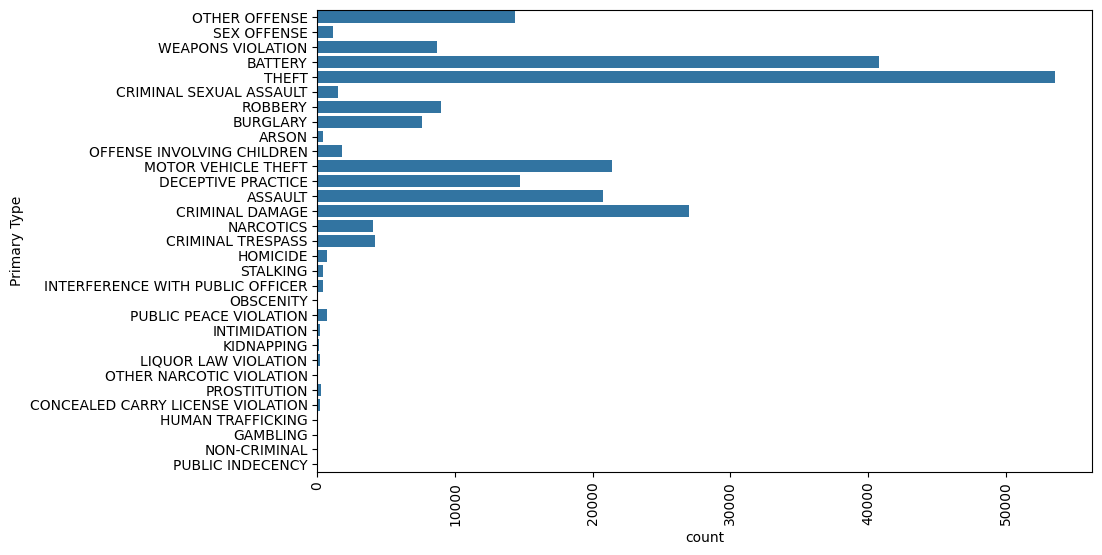

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(dataset['Primary Type'])
plt.xticks(rotation=90)
plt.show()


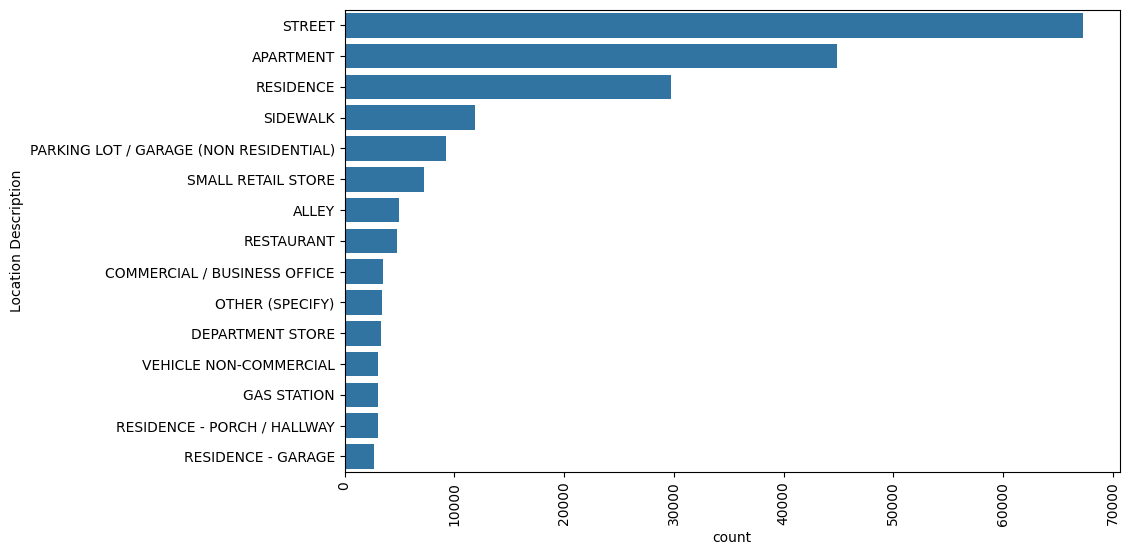

In [12]:
ordem_by_location = dataset['Location Description'].value_counts().iloc[:15].index


plt.figure(figsize=(10, 6))
sns.countplot(dataset['Location Description'], order=ordem_by_location)
plt.xticks(rotation=90)
plt.show()





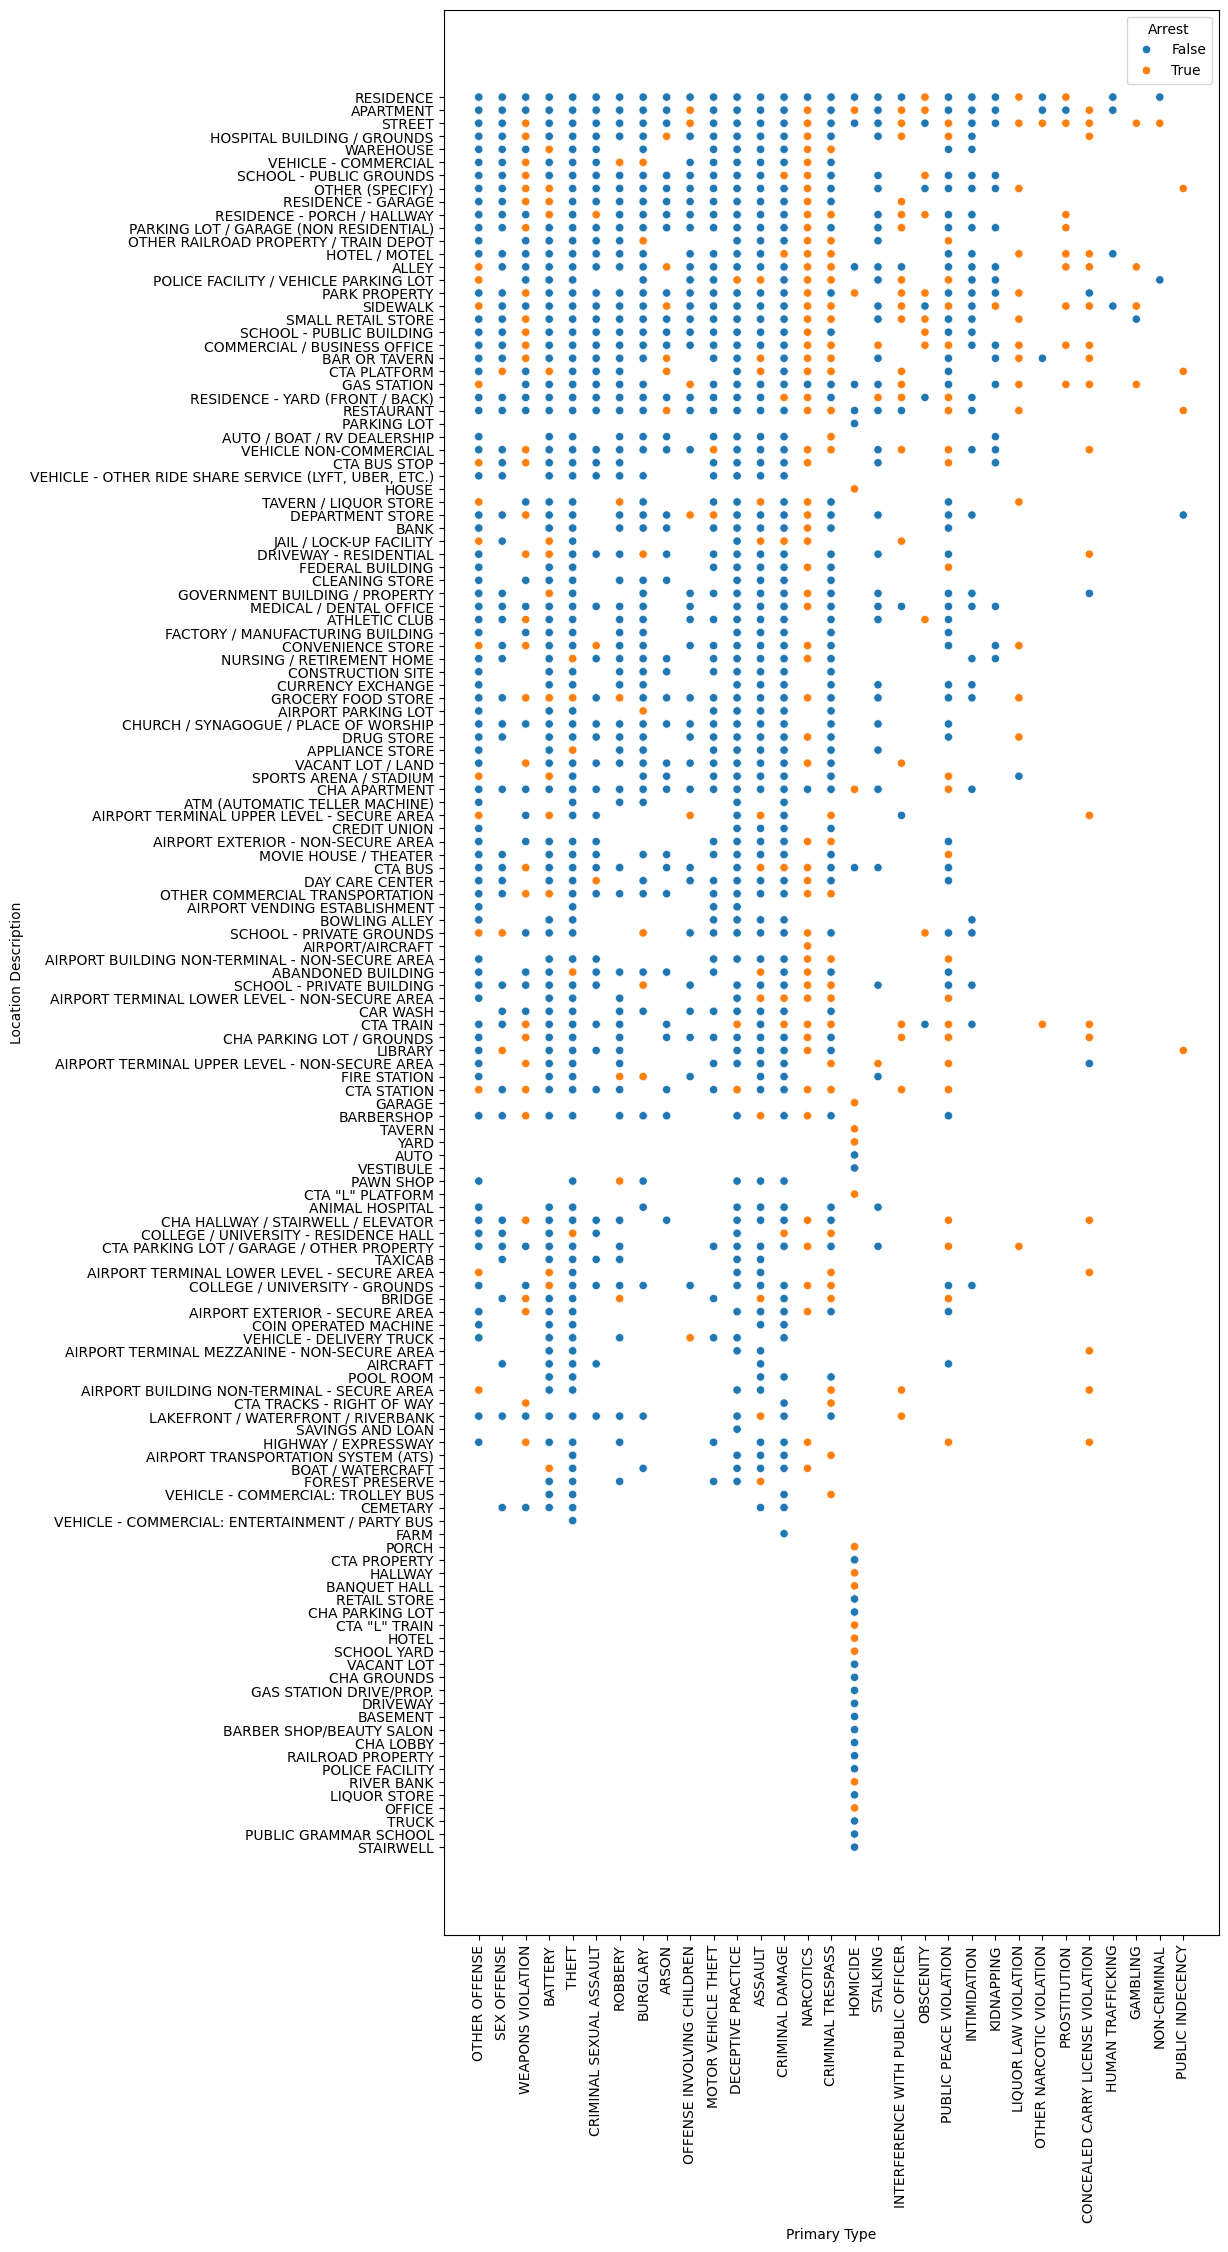

In [13]:
# a sccater primary type more than zero by location hue arrest :
plt.figure(figsize=(10, 25))

sns.scatterplot(x='Primary Type', y='Location Description', data=dataset, hue='Arrest')

plt.xticks(rotation=90)
plt.show()



In [14]:
# split the feature into categorical and numerical features:
categorical_columns = dataset.select_dtypes(include=['object', 'bool']).columns
numerical_columns = dataset.select_dtypes(exclude=['object', 'bool']).columns


In [15]:
numerical_columns

Index(['Beat', 'District', 'Ward', 'Community Area', 'X Coordinate',
       'Y Coordinate', 'Year', 'Latitude', 'Longitude', 'Month', 'Day',
       'day_of_week'],
      dtype='object')

In [16]:
# turn categorical columns into numerical columns by label encoding:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_columns:
    dataset[col] = le.fit_transform(dataset[col])
    
# scale the numerical columns:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for col in numerical_columns:
    dataset[col] = scaler.fit_transform(dataset[col].values.reshape(-1, 1))



In [17]:
# split the dataset into features and target:
X = dataset.drop('Arrest', axis=1)
y = dataset['Arrest']


In [18]:
X.head()

,Block,IUCR,Primary Type,Description,Location Description,Domestic,Beat,District,Ward,Community Area,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,day_of_week
0,22117,165,22,129,102,1,-0.604497,-0.606283,-0.51572,1.469230,...,0.322777,-0.830881,0.0,650,-0.830042,0.313887,33088,-1.755626,-0.194461,0.496180
1,22952,83,27,227,17,0,-1.169548,-1.171600,-1.29078,1.515664,...,1.175904,-0.922510,0.0,650,-0.925110,1.173189,28577,0.347962,-1.210515,0.496180
2,19233,85,27,13,102,0,0.662630,0.665681,1.10486,-1.177456,...,-1.607445,1.577777,0.0,650,1.580208,-1.602933,112043,0.347962,-0.194461,1.499545
3,22915,68,30,214,119,0,-0.591783,-0.606283,-0.44526,1.469230,...,0.269077,-0.934556,0.0,650,-0.933252,0.258111,28202,1.249500,-0.646040,-0.005502
5,4227,230,2,103,77,1,0.083453,0.100364,0.18888,-0.573826,...,-0.507369,0.618408,0.0,652,0.619119,-0.503009,81559,-1.455114,0.370014,0.997862


In [ ]:
# split the dataset into training and testing sets:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

